#### Here we will build a customer churn prediction model using artificial neural network/ANN. Customer churn measures how and why are customers leaving the business. 
#### Dataset:telecom customer churn dataset from kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

### About the Dataset: (from kaggle)

Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

    Customers who left within the last month – the column is called Churn
    Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.drop("customerID",axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

#ignore the errors and check the null values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [11]:
df.gender.value_counts()

#Approximatly same

Male      3555
Female    3488
Name: gender, dtype: int64

In [12]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [13]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [14]:
df.Churn.value_counts()

# Imbalanced data : we have more instances of No then Yes

No     5174
Yes    1869
Name: Churn, dtype: int64

## Visualization

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

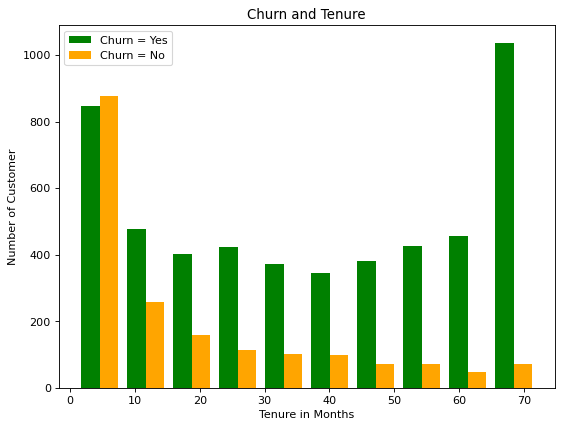

In [16]:
figure(figsize=(8, 6), dpi=80)
churn_t_no = df1[df1.Churn == "No"].tenure
churn_t_yes = df1[df1.Churn == "Yes"].tenure

plt.hist([churn_t_no,churn_t_yes],color=["green","orange"],label=["Churn = Yes","Churn = No"])
plt.title("Churn and Tenure")
plt.xlabel("Tenure in Months")
plt.ylabel("Number of Customer")
plt.legend()

#### People with Higher Tenurity tend to not leave but we can see that people with lower tenurity have a higher Churn rate

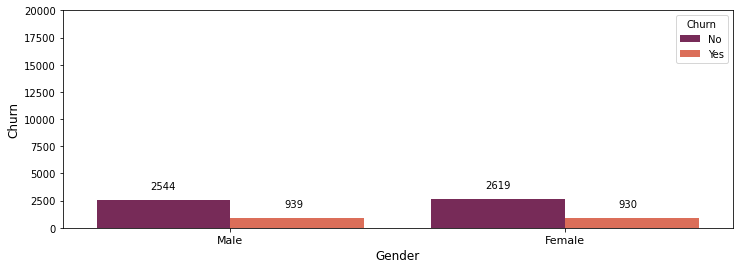

In [17]:
## Relation on Charges

plt.figure(figsize=(12,4))
ax = sns.countplot(data = df1, x = 'gender', hue="Churn", palette = 'rocket')

plt.xlabel("Gender", fontsize= 12)
plt.ylabel("Churn", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

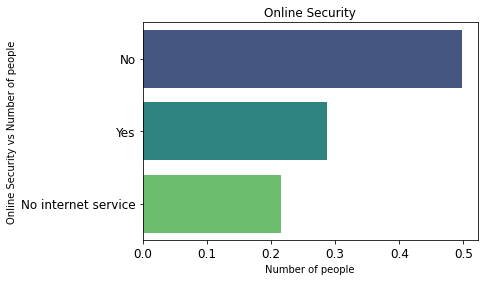

In [18]:
status = df1["OnlineSecurity"].value_counts(normalize=True)

sns.barplot(status.values, status.index, palette='viridis')
plt.title('Online Security')
plt.xlabel('Number of people')
plt.ylabel('Online Security vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Contract and Churn')

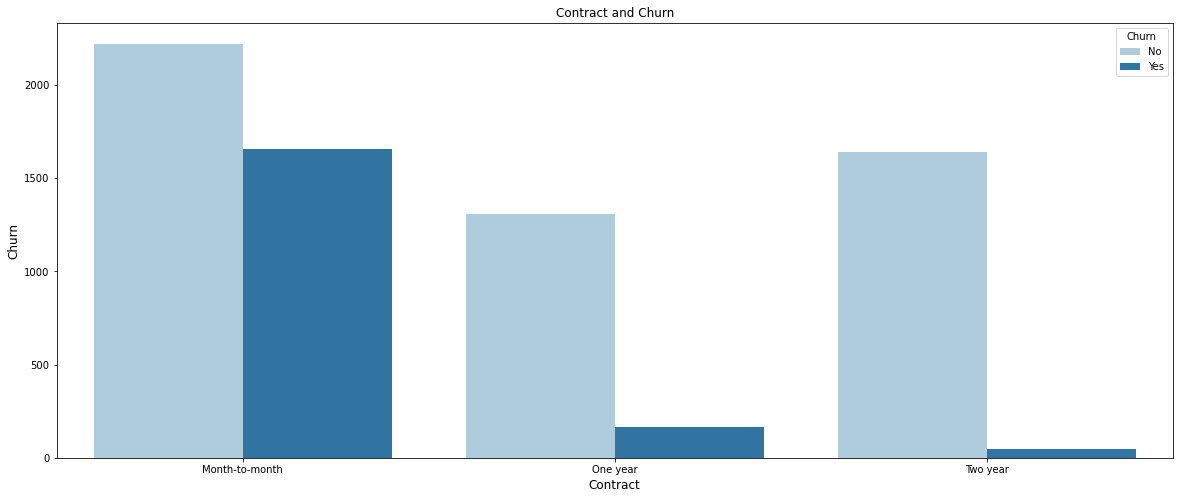

In [20]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df1, x = 'Contract', hue="Churn", palette = 'Paired')

plt.xlabel("Contract", fontsize= 12)
plt.ylabel("Churn", fontsize= 12)
plt.title("Contract and Churn")


#### People with Month to Month contract seem to leave soon, than prople with 1 or 2 years of contract

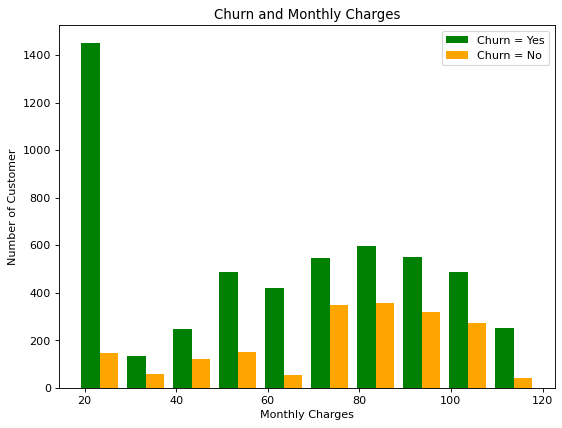

In [21]:
figure(figsize=(8, 6), dpi=80)
month_churn_n = df1[df1.Churn == "No"].MonthlyCharges
month_churn_y = df1[df1.Churn == "Yes"].MonthlyCharges

plt.hist([month_churn_n,month_churn_y],color=["green","orange"],label=["Churn = Yes","Churn = No"])
plt.title("Churn and Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customer")
plt.legend()

In [22]:
def columns_objects(x):
    for i in df:
        if df[i].dtype == "object":
           print (i ,": ", df[i].unique())

In [23]:
columns_objects(df1)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :  ['No' 'Yes']


In [24]:
## Replacing No internet service with NO
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [25]:
## Converting object to float/int : 

In [26]:
cat_columns = ['Partner', 'Dependents','PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling',
               'Churn']

In [28]:
for i in cat_columns:
    df1[i].replace({"Yes" : 1, "No": 0},inplace = True)

In [29]:
for i in df1:
           print (i ,": ", df1[i].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [0 1]
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  [0 1]
TechSupport :  [0 1]
StreamingTV :  [0 1]
StreamingMovies :  [0 1]
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  [1 0]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [30]:
df1["gender"].replace({"Female" : 1 ,"Male" : 0},inplace = True)

In [31]:
df1["gender"].value_counts()

0    3549
1    3483
Name: gender, dtype: int64

In [32]:
# PaymentMethod, Contract,InternetService - One Hot Encoding
df2 = pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [33]:
scaling = [ "tenure", "MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df2[scaling] = scale.fit_transform(df2[scaling])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Using Models without Resampling the data

In [34]:
X = df2.drop("Churn", axis=1)
y = df2.Churn

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [36]:
print ("The shape of X test is:", X_test.shape)
print ("The shape of X train is:", X_train.shape)
print ("The shape of y test is:", y_test.shape)
print ("The shape of y train is:", y_train.shape)

The shape of X test is: (1407, 26)
The shape of X train is: (5625, 26)
The shape of y test is: (1407,)
The shape of y train is: (5625,)


In [37]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

2022-01-06 14:33:57.376618: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [38]:
def ANN(X_train,y_train,X_test,y_test,loss, weights):
    model = keras.Sequential([
    keras.layers.Dense(22,input_shape = (26,),activation="relu"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
    ])

    model.compile(optimizer = "adam",
              loss = "binary_crossentropy", # output is binary
              metrics = ["accuracy"])
    
    if weights == -1:
        model.fit(X_train,y_train, epochs = 100)
    else:
        model.fit(X_train,y_train,epochs = 100, class_weights= weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    
    print("Classification Report : ", classification_report(y_test, y_pred))
    
    return y_pred
 


In [39]:
y_pred = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

2022-01-06 14:34:03.909110: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-01-06 14:34:04.010878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-06 14:34:04.011043: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 178.84GiB/s
2022-01-06 14:34:04.011069: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-01-06 14:34:04.033267: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-01-06 14:34:04.033437: I tensorflow/stream_executor/pla

Epoch 1/100


2022-01-06 14:34:05.383462: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


 37/176 [=====>........................] - ETA: 0s - loss: 0.5685 - accuracy: 0.7517

2022-01-06 14:34:06.423623: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


176/176 [==============================] - 2s 4ms/step - loss: 0.4892 - accuracy: 0.7612
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.7995
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4176 - accuracy: 0.8018
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4142 - accuracy: 0.8073
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4112 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4102 - accuracy: 0.8096
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.8112
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4079 - accuracy: 0.8146
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4070 - accuracy: 0.8107
E

176/176 [==============================] - 1s 4ms/step - loss: 0.3628 - accuracy: 0.8302
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3618 - accuracy: 0.8263
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3610 - accuracy: 0.8318
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.8279
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3606 - accuracy: 0.8304
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3596 - accuracy: 0.8260
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3603 - accuracy: 0.8290
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3586 - accuracy: 0.8304
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3589 - accuracy: 0.8320
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3571 - accuracy: 

### The precision for 1 : is 0.57 and Accuracy is 63 but for 0 these values are more

## Sampling the Data

In [42]:
##Class Count

class_count_0 , class_count_1 = df1.Churn.value_counts()

#Divide by Class:

df_class_0 = df2[df2["Churn"] == 0]
df_class_1 = df2[df2["Churn"] == 1]


In [43]:
class_count_0, class_count_1

(5163, 1869)

In [44]:
df_class_0.shape

(5163, 27)

In [45]:
df_class_1.shape

(1869, 27)

## UnderSampling  - class

In [46]:
df_class_0_under = df_class_0.sample(class_count_1)
df_test_under = pd.concat([df_class_0_under,df_class_1], axis= 0)
print("Random UnderSampling")
print(df_test_under.Churn.value_counts())

Random UnderSampling
0    1869
1    1869
Name: Churn, dtype: int64


In [47]:
X = df_test_under.drop("Churn", axis = 1)
y = df_test_under.Churn

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=30, stratify=y)

#stratify to make sure we have balanced samples

In [48]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [49]:
y_pred1 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6363 - accuracy: 0.6328
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7445
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.7532
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.7599
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4833 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4764 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.7722
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.8000
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.8000
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4194 - accuracy: 0.8013
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.8040
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8030
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4166 - accuracy: 0.8003
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8027
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4138 - accuracy: 0.8060
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4162 - accuracy: 0.8017
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4142 - accuracy: 0.8050
Epoch 93/100


### Precision and Recall Improved for both 0 and 1


# Method 2 Oversampling

In [50]:
class_count_0, class_count_1

(5163, 1869)

In [51]:
df_class_1.shape

(1869, 27)

In [52]:
df_over_class_1 = df_class_1.sample(class_count_0, replace=True)
df_over_class_1.shape

(5163, 27)

In [53]:
df_under_test = pd.concat([df_over_class_1, df_class_0],axis=0)
print("Random Oversampling: ")
print(df_under_test.Churn.value_counts())

Random Oversampling: 
1    5163
0    5163
Name: Churn, dtype: int64


In [54]:
X = df_under_test.drop("Churn", axis = 1)
y = df_under_test.Churn

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=30, stratify=y)

#stratify to make sure we have balanced samples

In [55]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [56]:
y_pred2 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5843 - accuracy: 0.6867
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4965 - accuracy: 0.7591
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4924 - accuracy: 0.7640
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4872 - accuracy: 0.7655
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4848 - accuracy: 0.7665
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4809 - accuracy: 0.7694
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4781 - accuracy: 0.7667
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4750 - accuracy: 0.7703
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4720 - accuracy: 0.7730
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4701 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3906 - accuracy: 0.8188
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3903 - accuracy: 0.8183
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3892 - accuracy: 0.8184
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3899 - accuracy: 0.8194
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3891 - accuracy: 0.8145
Epoch 86/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3887 - accuracy: 0.8189
Epoch 87/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3879 - accuracy: 0.8197
Epoch 88/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8211
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3868 - accuracy: 0.8178
Epoch 90/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3869 - accuracy: 

## More Improvement

## Using SMOTE - 

uses KNN


In [57]:
X = df2.drop('Churn', axis= 1)
y = df2.Churn

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority") 
X_sm,y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [59]:

X_train,X_test, y_train,y_test = train_test_split(X_sm,y_sm, 
                                                  test_size=0.2, 
                                                  random_state=30, 
                                                  stratify=y_sm)

#stratify to make sure we have balanced samples

In [60]:
y_pre_3 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5653 - accuracy: 0.7063
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4778 - accuracy: 0.7719
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4662 - accuracy: 0.7781
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4603 - accuracy: 0.7816
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4552 - accuracy: 0.7834
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4515 - accuracy: 0.7860
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4488 - accuracy: 0.7880
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.7921
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.7931
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4383 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3501 - accuracy: 0.8452
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3521 - accuracy: 0.8426
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3490 - accuracy: 0.8437
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3530 - accuracy: 0.8466
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3508 - accuracy: 0.8426
Epoch 86/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.8462
Epoch 87/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3504 - accuracy: 0.8443
Epoch 88/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3494 - accuracy: 0.8460
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3479 - accuracy: 0.8464
Epoch 90/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3488 - accuracy: 

## Overall Accuracy for 01-and 0 has increased using SMOTE